# **1. Ziele definieren & Informationsbedarf klären**

Die Bevölkerungsentwicklung stellt einen zentralen Faktor für die Planung und Steuerung gesellschaftlicher, wirtschaftlicher und politischer Prozesse dar. In der Schweiz beeinflussen Veränderungen in der Bevölkerungszahl beispielsweise die Raumplanung, den öffentlichen Dienstleistungsbedarf oder die Infrastrukturauslastung.

Diese Arbeit untersucht die Bevölkerungsentwicklung in der Schweiz im Zeitraum von 2013 bis 2023 auf gesamtschweizerischer sowie kantonaler Ebene. Ein besonderes Augenmerk liegt dabei auf regionalen Unterschieden im Wachstum und möglichen strukturellen Mustern, wie etwa urbanen versus ländlichen Entwicklungen.

Zudem soll geklärt werden, welche Kantone überdurchschnittliches oder unterdurchschnittliches Bevölkerungswachstum aufweisen, und ob sich über die Jahre hinweg bestimmte Trends oder Abweichungen vom nationalen Durchschnitt feststellen lassen. Zur Beantwortung dieser Fragestellungen wurden folgende Forschungsfragen (F1–F5) formuliert:
<br>


F1: Wie hat sich die Bevölkerungszahl gesamtschweizerisch und pro Kanton von 2013 bis 2023 entwickelt?
<br>

F2: Welche Kantone verzeichnen das stärkste bzw. schwächste Bevölkerungswachstum?
<br>

F3: Welche Trends lassen sich aus der bisherigen Entwicklung ableiten, und wie könnte sich die Bevölkerung bis 2030 entwickeln? (Prognose)
<br>


F4: Welche Kantone weichen besonders stark vom nationalen Wachstumstrend ab?
<br>

F5: Lassen sich strukturelle Unterschiede zwischen städtischen und ländlichen Kantonen erkennen?
<br>

# **2. Informationen beschaffen**
Für die Analyse werden Daten vom Bundesamt für Statistik verwendet. Der verwendete Datensatz beinhaltet Daten zur Struktur der ständigen Wohnbevölkerung nach Kanton von 1999-2023. Die Zahlen wurden am 22.08.2024 veröffentlicht. Für das Jahr 2024 stehen aktuell noch keine definitiven Zahlen zur Verfügung. 

Die verwendeten Rohdaten wurden im Vorfeld von der Website heruntergeladen und liegen im CSV-Format im Abgabeordner vor. 
<br>

Bundesamt für Statistik. (2024, August 22). Struktur der ständigen Wohnbevölkerung nach Kanton, 1999-2023—1999-2023 | Tabelle. Struktur der ständigen Wohnbevölkerung nach Kanton, 1999-2023 - 1999-2023  |  Tabelle. https://www.bfs.admin.ch/asset/de/32229034


<br>

# **3. Daten analysieren**






In [1]:
# Daten analysieren
import pandas as pd
import numpy as np
import os

# Excel-Verarbeitung
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Visualisierung
import matplotlib.pyplot as plt

# Statistik (optional, für spätere Prognosen)
# from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, linregress

# Formatierungen
import matplotlib.ticker as mtick
from IPython import display

# Anzeigeoptionen
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Warnungen von openpyxl unterdrücken
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

2.2.3


## Einlesen der Dateien
Die daten werden eingelesen und initial geprüft.

In [2]:
# Excel-Datei mit allen Jahren laden
excel_path = "Rohdaten/Struktur.xlsx"
xls = pd.ExcelFile(excel_path)

# Relevante Jahre definieren
jahre = [str(j) for j in range(2013, 2024)]

# Beispiel: Ein Jahr zum Testen einlesen
test_df = xls.parse("2013", skiprows=4)
test_df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,städtischer Kerne
0,Schweiz,8139631.0,1653511.0,5053373.0,1432747.0,4022091.0,4117540.0,6202184.0,1937447.0,3537837.0,3527929.0,407667.0,652608.0,528.0,12174.0,888.0,5106473.0,1767144.0,1266014.0
1,Genferseeregion,1545817.0,333823.0,954579.0,257415.0,755704.0,790113.0,1037401.0,508416.0,688681.0,650724.0,73017.0,130406.0,134.0,2658.0,197.0,1063222.0,323493.0,159102.0
2,Waadt,749373.0,167283.0,461284.0,120806.0,366766.0,382607.0,503493.0,245880.0,336758.0,314154.0,34782.0,62238.0,44.0,1306.0,91.0,467322.0,204856.0,77195.0
3,Wallis,327011.0,66744.0,201026.0,59241.0,161991.0,165020.0,254273.0,72738.0,137702.0,146860.0,17922.0,24212.0,31.0,269.0,15.0,168248.0,76856.0,81907.0
4,Genf,469433.0,99796.0,292269.0,77368.0,226947.0,242486.0,279635.0,189798.0,214221.0,189710.0,20313.0,43956.0,59.0,1083.0,91.0,427652.0,41781.0,0.0


## Bereinigung der Daten
Im Rahmen der Analyse wurde eine systematische Datenbereinigung der Excel-Datei Struktur.xlsx vorgenommen. Diese Datei enthält für jedes Jahr zwischen 2013 und 2023 ein separates Tabellenblatt mit Bevölkerungsdaten nach Kanton. Die ursprünglichen Daten enthielten zusätzliche Formatierungen, Überschriften, leere Zeilen sowie weitere Spalten, die für die Analyse nicht relevant waren.

Die Bereinigung erfolgte in folgenden Schritten:

    Auswahl der relevanten Tabellenblätter:
    Es wurden ausschließlich die Blätter der Jahre 2013 bis 2023 berücksichtigt. Frühere Jahre wurden ausgeschlossen, da sie nicht Teil des Untersuchungszeitraums sind.

    Zeilenbereinigung:
    Innerhalb jedes Tabellenblattes wurden nur die Zeilen 5 bis 36 (Index 4 bis 35) übernommen, da diese die 26 Kantone sowie einige zusätzliche Regionen enthalten. Oberhalb dieser Zeilen befanden sich nur Titelzeilen und Metadaten.

    Spaltenauswahl:
    Es wurden nur die ersten neun Spalten (A bis I) einbezogen. Diese enthalten:

        Region (Kanton)

        Gesamtbevölkerung

        Altersgruppen: 0–19, 20–64, 65+

        Geschlecht: Männlich, Weiblich

        Staatsangehörigkeit: Schweizer, Ausländer

    Spaltenbeschriftungen vereinheitlicht:
    Die ursprünglichen, teils mehrzeiligen oder sprachlich gemischten Spaltennamen wurden durch einheitliche, verständliche Bezeichnungen ersetzt:

        "Region", "Total", "0–19", "20–64", "65+", "Männlich", "Weiblich", "Schweizer", "Ausländer"

    Speicherung der bereinigten Daten:
    Die bereinigten Tabellen wurden sowohl:

        in einer neuen Excel-Datei (Struktur_bereinigt.xlsx) gespeichert – mit einem Tabellenblatt pro Jahr,

        als auch in einem Python-Wörterbuch (daten_bereinigt) zur Weiterverarbeitung in Pandas geladen.

In [3]:
def bereinige_rohdaten(eingabe_datei: str, ausgabe_datei: str) -> dict:
    """
    Bereinigt alle Tabellenblätter ab 2013 in der Bevölkerungs-Excel:
    • behält Zeilen 5–36   (Excel-Index 4–35)
    • behält Spalten A–I   (DataFrame-Index 0–8)
    • vergibt einheitliche Spaltennamen
    • schreibt jede Jahres-Tabelle in eine neue, saubere Excel-Datei
    • liefert ein Dict {jahr: DataFrame}
    """
    # Excel öffnen und relevante Blätter (≥2013) ermitteln
    xls = pd.ExcelFile(eingabe_datei)
    relevante_blaetter = sorted(
        [s for s in xls.sheet_names if s.isdigit() and int(s) >= 2013],
        key=int
    )

    # Spalten A–I (Index 0–8) & neue Überschriften
    keep_cols = list(range(0, 9))
    new_cols = [
        "Region", "Total", "0–19", "20–64", "65+",
        "Männlich", "Weiblich", "Schweizer", "Ausländer"
    ]

    # neue Arbeitsmappe anlegen
    wb = Workbook()
    wb.remove(wb.active)      # Standard-Sheet löschen

    jahres_dfs = {}

    for sheet in relevante_blaetter:
        df = pd.read_excel(eingabe_datei, sheet_name=sheet)

        # Zeilen & Spalten filtern, Spalten umbenennen
        df_clean = df.iloc[4:36, keep_cols].copy()
        df_clean.columns = new_cols

        jahres_dfs[sheet] = df_clean.copy()  # für die Weiterverarbeitung

        # in neues Sheet der Ziel-Datei schreiben
        ws = wb.create_sheet(title=sheet)
        for r in dataframe_to_rows(df_clean, index=False, header=True):
            ws.append(r)

    # Ordner anlegen (falls nicht vorhanden) & Datei speichern
    os.makedirs(os.path.dirname(ausgabe_datei), exist_ok=True)
    wb.save(ausgabe_datei)
    print(f"✓ Bereinigte Datei gespeichert unter: {ausgabe_datei}")

    return jahres_dfs

# ------------------------------------------------------------
# 2) Funktion aufrufen
# ------------------------------------------------------------
eingabe_datei = "Rohdaten/Struktur.xlsx"
ausgabe_datei = "Output/Struktur_bereinigt.xlsx"

daten_bereinigt = bereinige_rohdaten(eingabe_datei, ausgabe_datei)

# ------------------------------------------------------------
# 3) Alle Jahres-DataFrames zu einem großen Table zusammenführen
# ------------------------------------------------------------
alle_jahre = []
for jahr, df in daten_bereinigt.items():
    df = df.copy()
    df["Jahr"] = int(jahr)
    alle_jahre.append(df)

gesamt_df = pd.concat(alle_jahre, ignore_index=True)

# ------------------------------------------------------------


✓ Bereinigte Datei gespeichert unter: Output/Struktur_bereinigt.xlsx


## Zusammenführung der Jahresdaten

Nach der Bereinigung der Bevölkerungsdaten für die Jahre 2013 bis 2023 liegen die Informationen in Form einzelner DataFrames vor – jeweils eines pro Jahr. Um eine konsistente Analyse über den gesamten Zeitraum zu ermöglichen, wurden diese Jahres-DataFrames in einem gemeinsamen Datensatz zusammengeführt.

In [4]:
# Liste für alle Jahresdaten
alle_jahre = []

# Jeden Jahres-DataFrame mit Jahr versehen & hinzufügen
for jahr, df in daten_bereinigt.items():
    df = df.copy()
    df["Jahr"] = int(jahr)
    alle_jahre.append(df)

# Alle DataFrames zusammenfügen
gesamt_df = pd.concat(alle_jahre, ignore_index=True)

# Vorschau
gesamt_df.head()


,Region,Total,0–19,20–64,65+,Männlich,Weiblich,Schweizer,Ausländer,Jahr
0,Schweiz,8139631,1653511,5053373,1432747,4022091,4117540,6202184,1937447,2013
1,Genferseeregion,1545817,333823,954579,257415,755704,790113,1037401,508416,2013
2,Waadt,749373,167283,461284,120806,366766,382607,503493,245880,2013
3,Wallis,327011,66744,201026,59241,161991,165020,254273,72738,2013
4,Genf,469433,99796,292269,77368,226947,242486,279635,189798,2013


In [7]:
# Pivot-Tabelle: Jahr = Zeilen, Region = Spalten, Werte = Total
pivot_df = gesamt_df.pivot_table(
    index="Jahr",
    columns="Region",
    values="Total",
    aggfunc="sum"
).sort_index()

# Sicherstellen, dass alle Werte numerisch sind
pivot_df = pivot_df.apply(pd.to_numeric, errors="coerce")

# Sicherheitsprüfung: Datentyp und Werte
print(pivot_df.dtypes)          # Muss float64 oder int64 anzeigen
print(pivot_df.head())          # Muss Zahlen zeigen, keine Strings oder "2.5"


Region
Aargau               int64
Appenzell A. Rh.     int64
Appenzell I. Rh.     int64
Basel-Landschaft     int64
Basel-Stadt          int64
Bern                 int64
Espace Mittelland    int64
Freiburg             int64
Genf                 int64
Genferseeregion      int64
Glarus               int64
Graubünden           int64
Jura                 int64
Luzern               int64
Neuenburg            int64
Nidwalden            int64
Nordwestschweiz      int64
Obwalden             int64
Ostschweiz           int64
Schaffhausen         int64
Schweiz              int64
Schwyz               int64
Solothurn            int64
St. Gallen           int64
Tessin               int64
Thurgau              int64
Uri                  int64
Waadt                int64
Wallis               int64
Zentralschweiz       int64
Zug                  int64
Zürich               int64
dtype: object
Region  Aargau  Appenzell A. Rh.  Appenzell I. Rh.  Basel-Landschaft  \
Jahr                                       

## Wie hat sich die Bevölkerungszahl gesamtschweizerisch und pro Kanton von 2013 bis 2023 entwickelt?



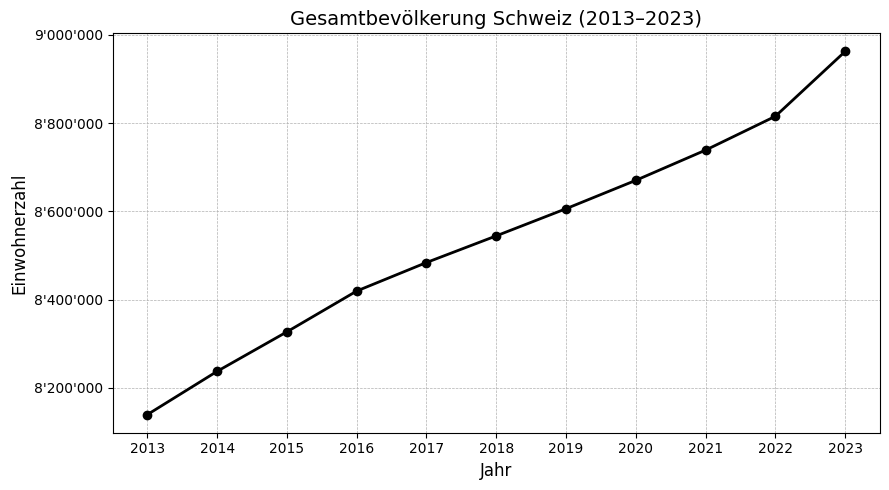

In [10]:
# Nur die offizielle Gesamtbevölkerung pro Jahr (aus Zeile "Schweiz")
gesamtbev_pro_jahr = pivot_df["Schweiz"]

# Plot der Bevölkerungsentwicklung
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(
    gesamtbev_pro_jahr.index,
    gesamtbev_pro_jahr.values,
    color="black",
    marker="o",
    linewidth=2
)

ax.set_title("Gesamtbevölkerung Schweiz (2013–2023)", fontsize=14)
ax.set_ylabel("Einwohnerzahl", fontsize=12)
ax.set_xlabel("Jahr", fontsize=12)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', "'")))
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xticks(gesamtbev_pro_jahr.index)
plt.tight_layout()
plt.show()


## Welche Kantone verzeichnen das stärkste bzw. schwächste Bevölkerungswachstum (2013–2023)?

In dieser Analyse wird das prozentuale Bevölkerungswachstum aller Schweizer Kantone über den Zeitraum von 2013 bis 2023 berechnet. Ziel ist es, regionale Unterschiede zu identifizieren und die Kantone mit dem stärksten bzw. schwächsten Wachstum sichtbar zu machen.

Die Ergebnisse werden in einem sortierten Balkendiagramm dargestellt. Die Gestaltung folgt IBCS-konformen Standards (neutrale Grautöne, klare Beschriftung, reduzierte Form).


In [14]:
# Nur echte Kantone verwenden (Ausschluss von Aggregatsregionen wie "Schweiz", "Ostschweiz", ...)
# Wir nehmen alle Spalten, die keine Aggregatregionen sind:
# Optional: Wenn du nur echte Kantone willst, kannst du hier explizit filtern
# oder alle behalten und ggf. Aggregierte Regionen später separat analysieren

# Wachstum berechnen: (2023 / 2013 - 1) * 100
wachstum_prozent = ((pivot_df.loc[2023] / pivot_df.loc[2013]) - 1) * 100
wachstum_prozent = wachstum_prozent.round(2).sort_values()


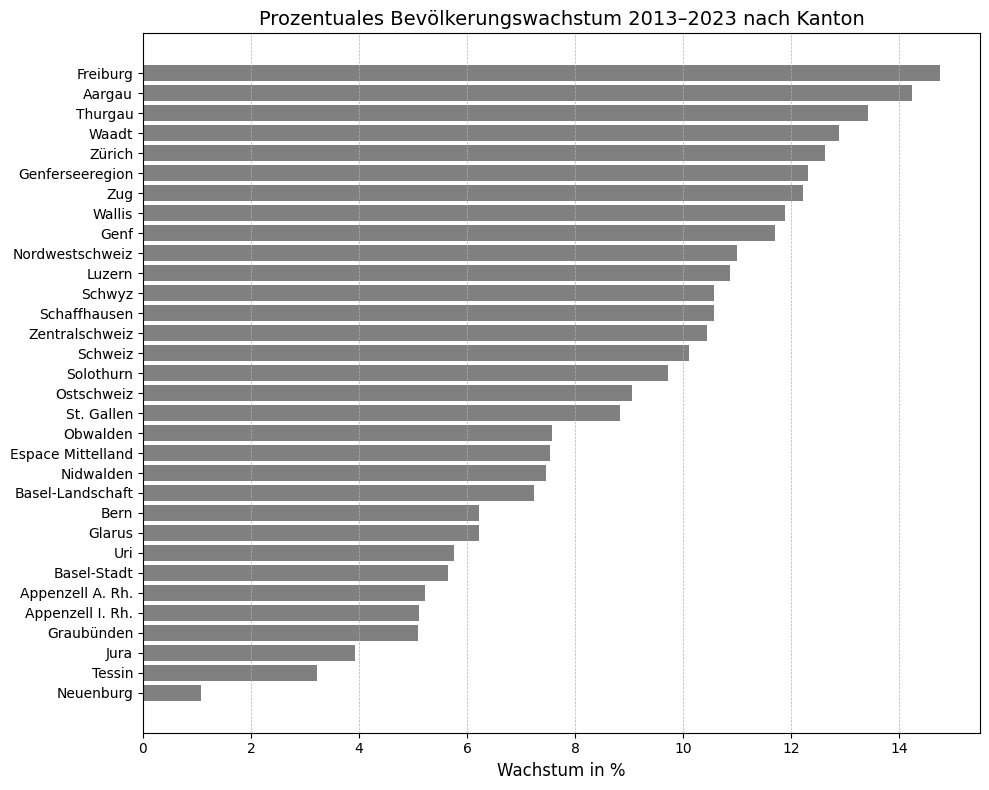

In [15]:
# Balkendiagramm: sortiert nach Wachstum
plt.figure(figsize=(10, 8))
bars = plt.barh(wachstum_prozent.index, wachstum_prozent.values, color="gray")

plt.title("Prozentuales Bevölkerungswachstum 2013–2023 nach Kanton", fontsize=14)
plt.xlabel("Wachstum in %", fontsize=12)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [18]:
# Top-5 Kantone mit dem höchsten Wachstum
print("Top 5 Kantone mit dem stärksten Wachstum:")
print(wachstum_prozent.tail(5))

# Schwächste 5 Kantone
print("\nSchwächste 5 Kantone:")
print(wachstum_prozent.head(5))


Top 5 Kantone mit dem stärksten Wachstum:
Region
Zürich      12.62
Waadt       12.88
Thurgau     13.42
Aargau      14.23
Freiburg    14.76
dtype: float64

Schwächste 5 Kantone:
Region
Neuenburg           1.07
Tessin              3.23
Jura                3.92
Graubünden          5.09
Appenzell I. Rh.    5.11
dtype: float64


## Prognose bis 2027
Basierend auf den Entwicklungen von 2013 bis 2023 wird ein linearer Trend pro Kanton berechnet, um eine Schätzung der Bevölkerungsentwicklung für die nächsten vier Jahre (2024–2027) zu ermöglichen.

Dabei wird eine lineare Regression durchgeführt. Die Prognose stellt keine exakte Vorhersage dar, sondern zeigt mögliche Tendenzen auf Grundlage vergangener Entwicklungen.

In [22]:
# Top 5 wachstumsstärkste Kantone
top5_kantone = wachstum_prozent.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 Kantone mit dem höchsten Wachstum:", top5_kantone)



Top 5 Kantone mit dem höchsten Wachstum: ['Freiburg', 'Aargau', 'Thurgau', 'Waadt', 'Zürich']


In [23]:
# Prognose nur von 2013 bis 2027 (inkl. 4 Jahre Vorausblick)
prognose_df = pd.DataFrame(index=range(2013, 2028), columns=pivot_df.columns)

for kanton in pivot_df.columns:
    y = pivot_df[kanton].dropna()
    x = np.array(y.index)
    y_values = y.values

    slope, intercept, _, _, _ = linregress(x, y_values)

    x_future = np.arange(2013, 2028)
    y_pred = intercept + slope * x_future

    prognose_df[kanton] = y_pred.round(0)


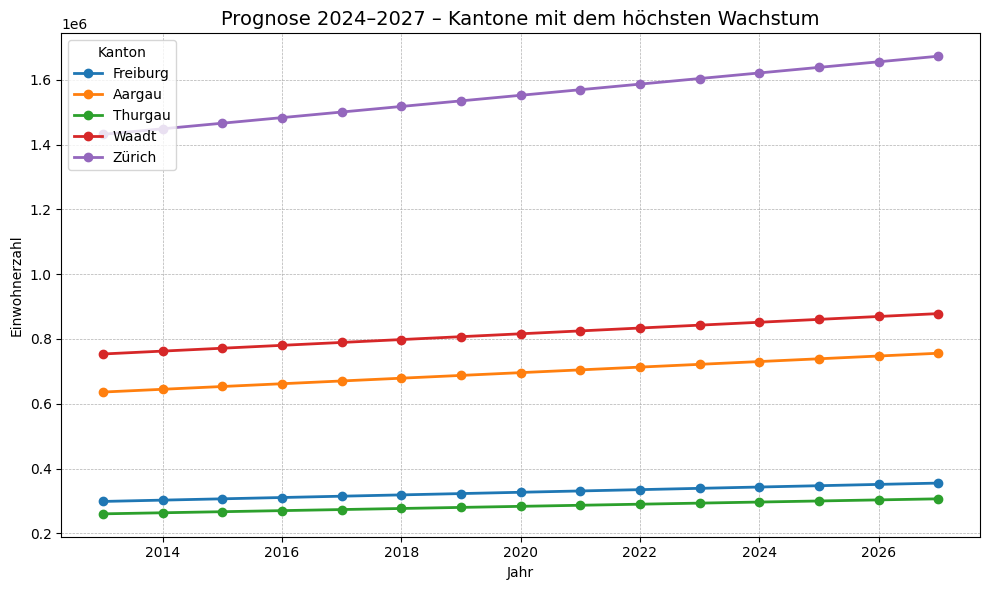

In [24]:
plt.figure(figsize=(10, 6))

for kanton in top5_kantone:
    plt.plot(prognose_df.index, prognose_df[kanton], label=kanton, marker="o", linewidth=2)

plt.title("Prognose 2024–2027 – Kantone mit dem höchsten Wachstum", fontsize=14)
plt.ylabel("Einwohnerzahl")
plt.xlabel("Jahr")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend(title="Kanton", loc="upper left")
plt.tight_layout()
plt.show()

## Welche Kantone weichen besonders stark vom nationalen Wachstumstrend ab?
Diese Analyse vergleicht das prozentuale Bevölkerungswachstum der Kantone von 2013 bis 2023 mit dem Schweizer Durchschnittswert.

Ziel ist es, Regionen zu identifizieren, die sich überdurchschnittlich stark oder schwach entwickelt haben. Die Abweichung wird grafisch dargestellt, um Ausreißer klar zu erkennen.

In [25]:
# Mittelwert über alle Regionen (inkl. Kantone und Aggregatregionen)
nationaler_durchschnitt = wachstum_prozent.mean()

# Abweichung jedes Kantons vom Schnitt
abweichung_vom_durchschnitt = wachstum_prozent - nationaler_durchschnitt
abweichung_vom_durchschnitt = abweichung_vom_durchschnitt.round(2).sort_values()


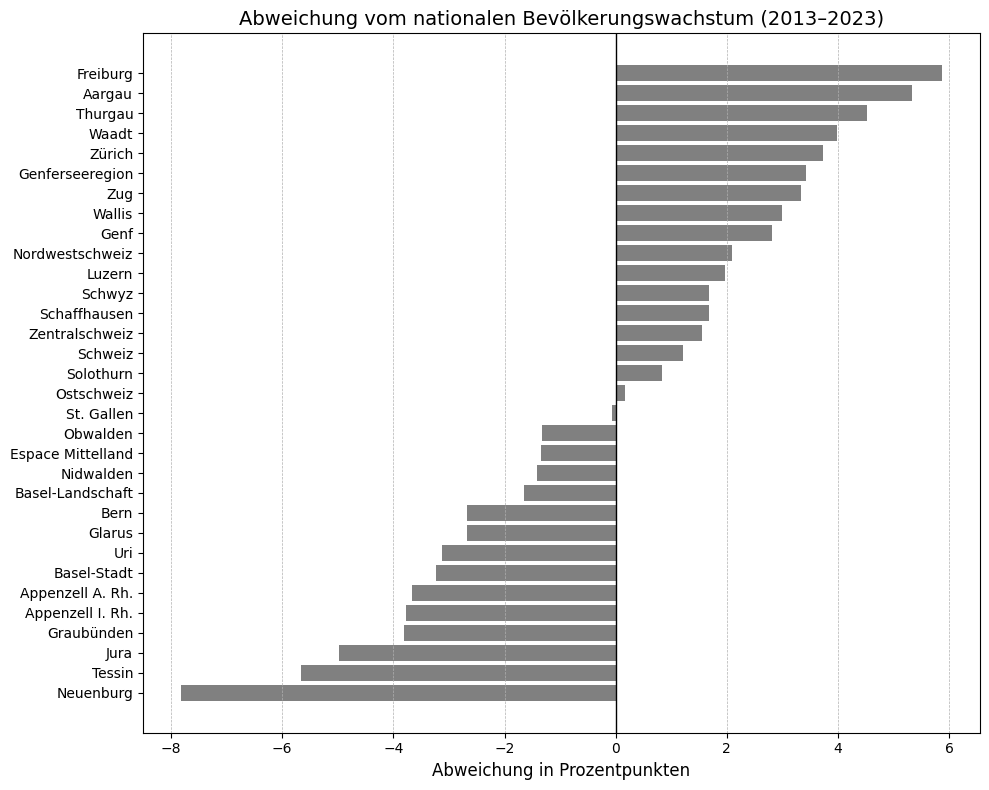

In [26]:
plt.figure(figsize=(10, 8))
plt.barh(abweichung_vom_durchschnitt.index, abweichung_vom_durchschnitt.values, color="gray")

plt.axvline(0, color="black", linewidth=1)  # Null-Linie
plt.title("Abweichung vom nationalen Bevölkerungswachstum (2013–2023)", fontsize=14)
plt.xlabel("Abweichung in Prozentpunkten", fontsize=12)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [27]:
# Top-5 über dem Schnitt
print("Top-5 überdurchschnittlich wachsend:")
print(abweichung_vom_durchschnitt.tail(5))

# Top-5 unterdurchschnittlich wachsend
print("\nTop-5 unterdurchschnittlich wachsend:")
print(abweichung_vom_durchschnitt.head(5))


Top-5 überdurchschnittlich wachsend:
Region
Zürich      3.73
Waadt       3.99
Thurgau     4.53
Aargau      5.34
Freiburg    5.87
dtype: float64

Top-5 unterdurchschnittlich wachsend:
Region
Neuenburg          -7.82
Tessin             -5.66
Jura               -4.97
Graubünden         -3.80
Appenzell I. Rh.   -3.78
dtype: float64


### F5: Strukturelle Unterschiede zwischen Stadt- und Landkantonen

In dieser Analyse werden die Kantone in zwei Gruppen unterteilt: städtisch und ländlich. Auf Basis des relativen Bevölkerungswachstums (2013–2023) wird untersucht, ob zwischen den beiden Gruppen signifikante Unterschiede bestehen.

Die Gruppierung erfolgt vereinfacht anhand der Urbanisierungsstruktur. Der Vergleich erfolgt über Mittelwerte und eine visuelle Darstellung.


In [28]:
# Einfache, manuell definierte Einteilung (vereinfachte Urbanisierungslogik)
staedtisch = [
    "Zürich", "Genf", "Basel-Stadt", "Bern", "Waadt", "Aargau", "Luzern", "St. Gallen", "Zug"
]

laendlich = [
    "Appenzell A. Rh.", "Appenzell I. Rh.", "Uri", "Obwalden", "Nidwalden",
    "Glarus", "Jura", "Schwyz"
]

# Mittelwert berechnen
wachstum_stadt = wachstum_prozent[wachstum_prozent.index.isin(staedtisch)].mean()
wachstum_land = wachstum_prozent[wachstum_prozent.index.isin(laendlich)].mean()


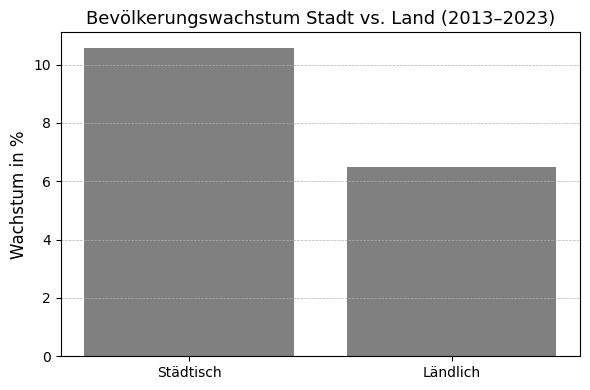

In [29]:
plt.figure(figsize=(6, 4))
plt.bar(["Städtisch", "Ländlich"], [wachstum_stadt, wachstum_land], color="gray")

plt.title("Bevölkerungswachstum Stadt vs. Land (2013–2023)", fontsize=13)
plt.ylabel("Wachstum in %", fontsize=12)
plt.grid(True, axis="y", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()
